In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Schedule functions

def α(t):
    return t

def β(t):
    return 1-t

In [19]:
#Components of result 2.1
def get_teacher_components(t,σ,n,λ):
    deno=β(t)**2*(λ+n-1)+α(t)**2*(λ*(1+σ**2)+(n-1)*σ**2)
    c=α(t)*(λ*(1+σ**2)+(n-1)*σ**2)/deno
    m=β(t)**2*n*(λ+n-1)/(λ+n)/deno
    qxi=β(t)*c/(λ+n)
    qeta=β(t)**2*(λ+n-1)/(λ+n)/deno
    
    return c,m,qxi,qeta

#Shorthands for combinations of the schedule functions and their derivative
def get_prefactors(t,σ,n,λ):
    c,_,_,_=get_teacher_components(t,σ,n,λ)
    
    γ=(1+α(t)/β(t))*c-1/β(t)
    ζ=(α(t)/β(t)+1)
    return γ, ζ



In [20]:

#ODE iterator
def summary_stats(σ,n,λ,Nsteps=100,return_t1_only=False):
    dt=1/Nsteps
    t=0
    theo={"R":[0],"Qxi":[0],"Qeta":[0],"t":[0],"Q":[1],"perp":[1]}
    t=dt
    
    R=0
    Qxi=0
    Qeta=0
    
    integral=1
    
    for i in range(Nsteps-1):
        c,m,qxi,qeta=get_teacher_components(t,σ,n,λ)
        γ,ζ=get_prefactors(t,σ,n,λ)
        
        integral*=(1+dt*γ)
        
        R+=dt*(γ*R+ζ*m)
        Qxi+=dt*(γ*Qxi+ζ*qxi)
        Qeta+=dt*(γ*Qeta+ζ*qeta)
        
        
        Q=R**2+Qxi**2*n+Qeta**2*n*σ**2#+integral**2
        perp=integral**2
        
        theo["R"].append(R)
        theo["Qxi"].append(Qxi)
        theo["Qeta"].append(Qeta/σ)
        theo["t"].append(t)
        theo["Q"].append(Q+perp)
        theo["perp"].append(perp)
        
        
        t+=dt
      
    if return_t1_only:
        return R,Qxi,Qeta,Q,perp
    return theo
    


In [21]:
stats=summary_stats(σ=1.5,n=8,λ=0.1,Nsteps=100)

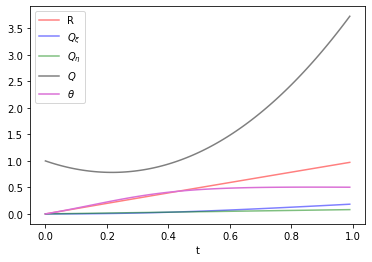

In [22]:
plt.plot(stats["t"],stats["R"],c="r",alpha=0.5,label="R")
plt.plot(stats["t"],np.abs(stats["Qxi"]),c="b",alpha=0.5,label=r"$Q_\xi$")
plt.plot(stats["t"],np.array(stats["Qeta"]),c="g",alpha=0.5,label=r"$Q_\eta$")
plt.plot(stats["t"],np.array(stats["Q"]),c="black",alpha=0.5,label=r"$Q$")
plt.plot(stats["t"],np.array(stats["R"])/np.sqrt(stats["Q"]),c="orchid", label=r"$\theta$")

plt.xlabel("t")

plt.legend()
